<a href="https://colab.research.google.com/github/khairillkmn/PRA-UAS-Data-Mining/blob/main/Pengecekandataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler


from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

from sklearn.metrics import roc_curve ,roc_auc_score, auc

import os
for dirname, _, filenames in os.walk('Employee_Salary_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('Employee_Salary_Dataset.csv')
X = df.iloc[:, [1, 2]].values
y = df.iloc[:, -1].values

In [ ]:
df.head(10)

,ID,Experience_Years,Age,Gender,Salary
0,1,5,28,Female,250000
1,2,1,21,Male,50000
2,3,3,23,Female,170000
3,4,2,22,Male,25000
4,5,1,17,Male,10000
5,6,25,62,Male,5001000
6,7,19,54,Female,800000
7,8,2,21,Female,9000
8,9,10,36,Female,61500
9,10,15,54,Female,650000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                35 non-null     int64 
 1   Experience_Years  35 non-null     int64 
 2   Age               35 non-null     int64 
 3   Gender            35 non-null     object
 4   Salary            35 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ KB


In [ ]:
df.isnull().sum()

ID                  0
Experience_Years    0
Age                 0
Gender              0
Salary              0
dtype: int64

In [ ]:
len(df[df.duplicated()])

0

In [ ]:
df=df.drop_duplicates(subset=None, keep='first', inplace=False)
len(df[df.duplicated()])

0

Text(0.5, 1.0, 'Checking imbalance')

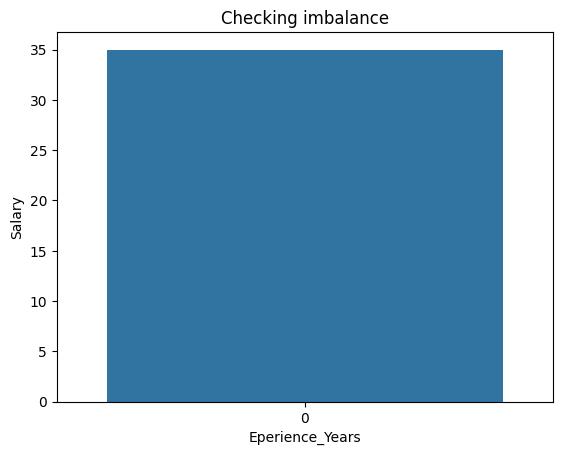

In [ ]:
sns.countplot(df["Age"])
plt.xlabel("Eperience_Years")
plt.ylabel("Salary")
plt.title("Checking imbalance")

<ipython-input-15-4580e8b7f774>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.distplot(df.skew(),hist=False)
<ipython-input-15-4580e8b7f774>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.skew(),hist=False)


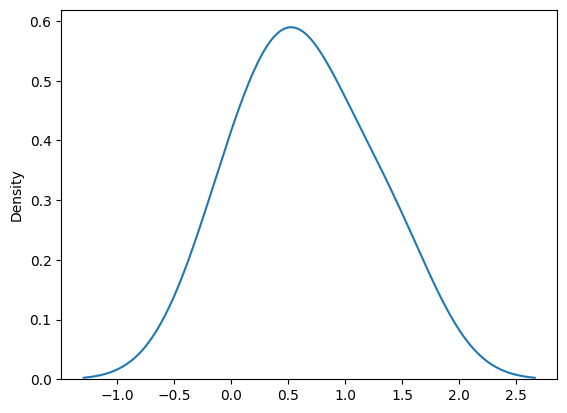

In [ ]:
sns.distplot(df.skew(),hist=False)
plt.show()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ID                       17.0
Experience_Years         12.5
Age                      31.0
Salary              3247500.0
dtype: float64


<ipython-input-16-d7397e803310>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-16-d7397e803310>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


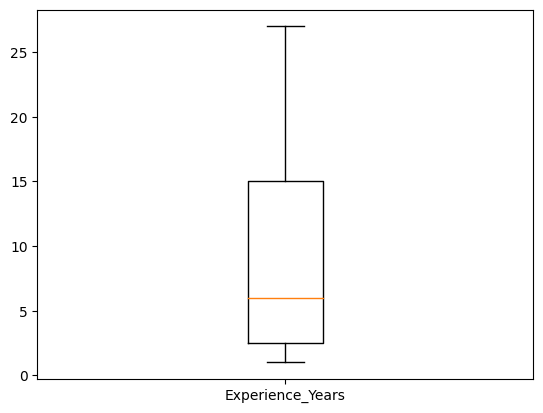

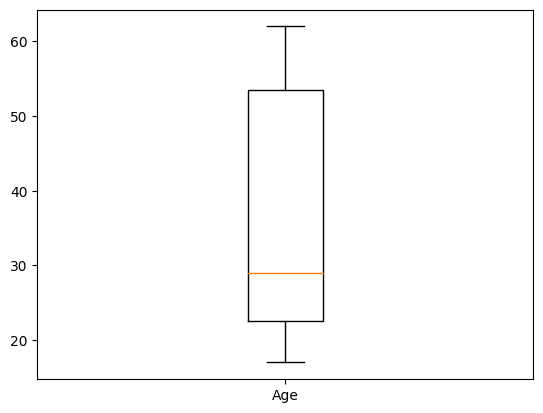

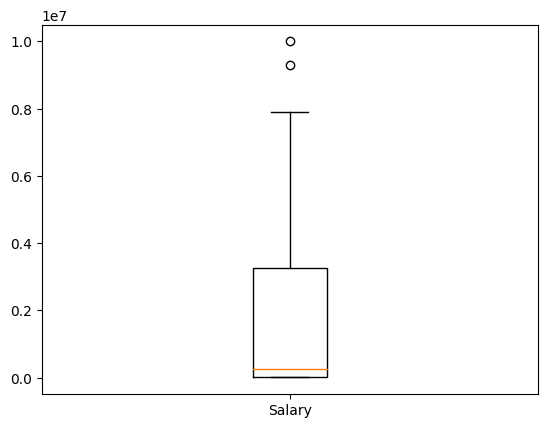

In [ ]:
plt.boxplot([df["Experience_Years"]])
plt.xticks([1],["Experience_Years"])
plt.show()
plt.boxplot([df["Age"]])
plt.xticks([1],["Age"])
plt.show()
plt.boxplot([df["Salary"]])
plt.xticks([1],["Salary"])
plt.show()

In [ ]:
print(df['Age'].quantile(0.10))
print(df['Age'].quantile(0.90))

21.0
54.0


In [ ]:
df["Age"] = np.where(df["Age"] <21.0, 21.0,df['Age'])
df["Age"] = np.where(df["Age"] >54.0, 54.0,df['Age'])

df.head()

,ID,Experience_Years,Age,Gender,Salary
0,1,5,28.0,Female,250000
1,2,1,21.0,Male,50000
2,3,3,23.0,Female,170000
3,4,2,22.0,Male,25000
4,5,1,21.0,Male,10000


In [ ]:
cols=['Experience_Years', 'Salary']
for label in cols:
    df[label]=LabelEncoder().fit_transform(df[label])
df.head()

,ID,Experience_Years,Age,Gender,Salary
0,1,4,28.0,Female,16
1,2,0,21.0,Male,10
2,3,2,23.0,Female,14
3,4,1,22.0,Male,9
4,5,0,21.0,Male,6


In [ ]:
df.corr()["Age"]

<ipython-input-21-5ab7bb3a5e18>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Age"]


ID                  0.298752
Experience_Years    0.962197
Age                 1.000000
Salary              0.804603
Name: Age, dtype: float64

<ipython-input-22-f1a090c0658b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = "RdYlGn", annot = True)


<Axes: >

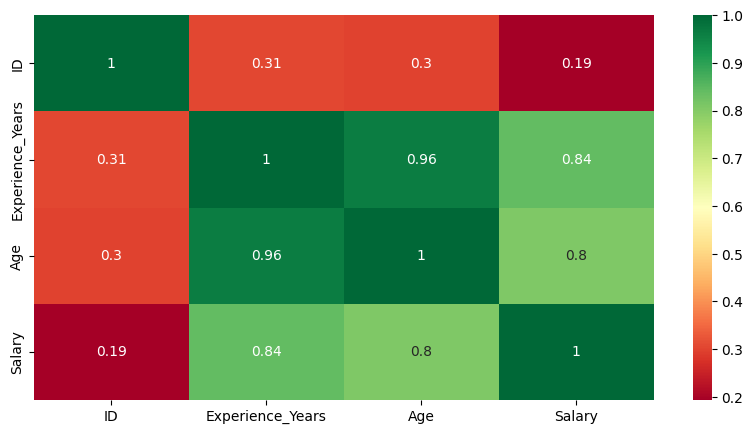

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), cmap = "RdYlGn", annot = True)

<Axes: xlabel='Salary'>

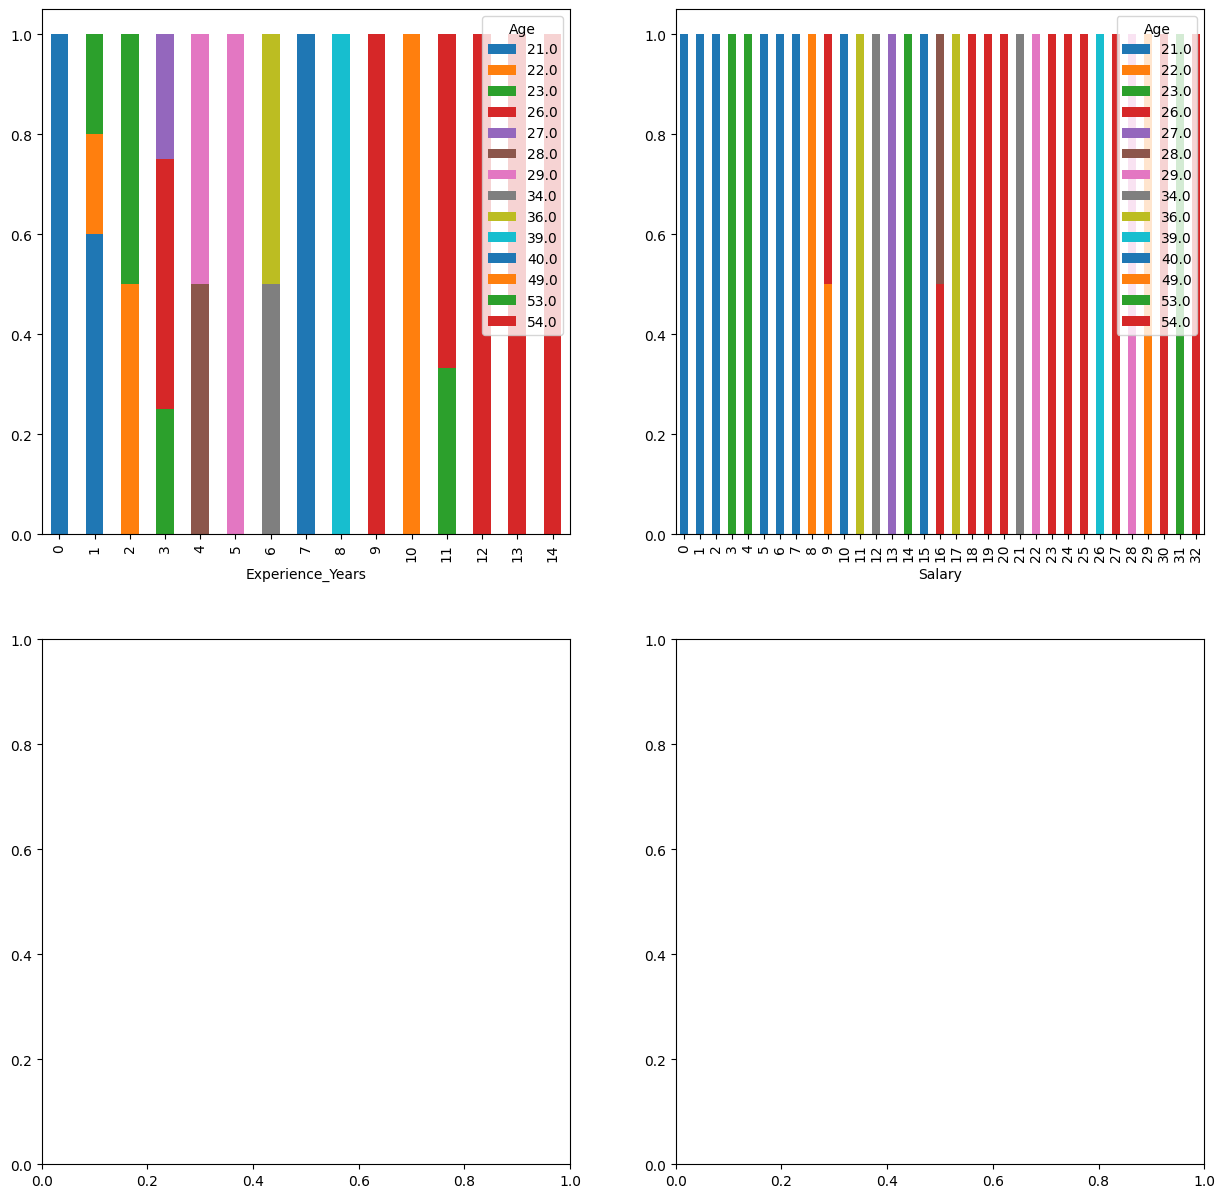

In [ ]:
# satisfactoryLevel vs left
fig, ax = plt.subplots(2,2,figsize = (15,15))
Experience_Years = pd.crosstab(df['Experience_Years'],df['Age'])
Experience_Years.div(Experience_Years.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[0,0])

#Salary vs age
Salary= pd.crosstab(df['Salary'],df['Age'])
Salary.div(Salary.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[0,1])